<a href="https://colab.research.google.com/github/AlexanderSychev2005/AlexanderSychev2005/blob/main/ml_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.target.shape

(1797,)

In [ ]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

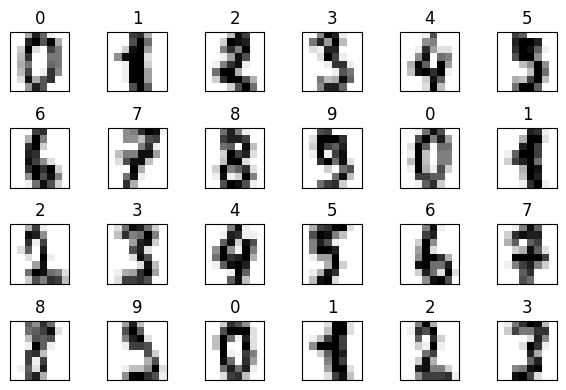

In [ ]:
fix, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.2)

In [ ]:
X_train.shape

(1437, 64)

In [ ]:
X_test.shape

(360, 64)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [ ]:
print(y_pred[:20])
print(y_test[:20])

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]


In [ ]:
knn.score(X_test, y_test)

0.9861111111111112

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9861111111111112

In [ ]:
import seaborn as sns

<Axes: >

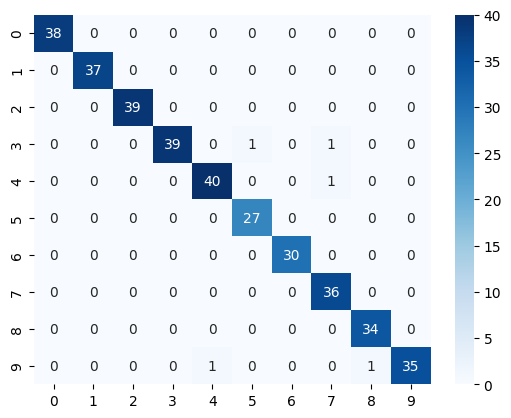

In [ ]:
names = [str(digit) for digit in digits.target_names]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=names, yticklabels=names)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
names = [str(digit) for digit in digits.target_names]

In [ ]:
print(classification_report(y_test, y_pred, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## SVM Classifier

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
y_pred_svc = classifier_svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svc = confusion_matrix(y_test, y_pred_svc)
accuracy_score(y_test, y_pred_svc)

0.9861111111111112

<Axes: >

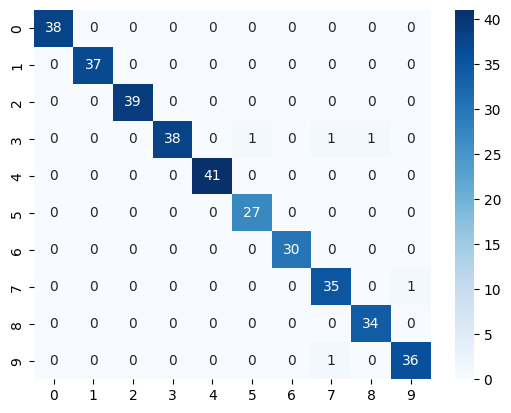

In [ ]:
names = [str(digit) for digit in digits.target_names]
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=names, yticklabels=names)

In [ ]:
print(classification_report(y_test, y_pred_svc, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.93      0.96        41
           4       1.00      1.00      1.00        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      0.97      0.96        36
           8       0.97      1.00      0.99        34
           9       0.97      0.97      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_score(y_test, y_pred_nb)

0.8555555555555555

<Axes: >

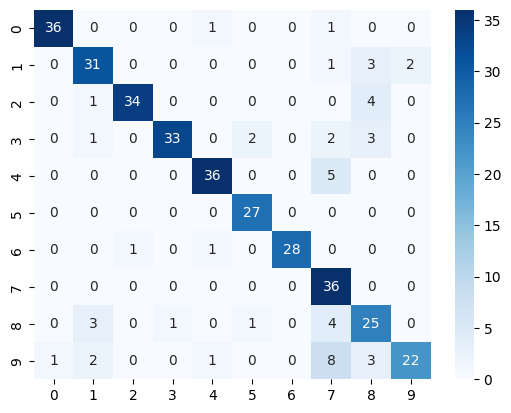

In [ ]:
names = [str(digit) for digit in digits.target_names]
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=names, yticklabels=names)

In [ ]:
print(classification_report(y_test, y_pred_nb, target_names=names))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.82      0.84      0.83        37
           2       0.97      0.87      0.92        39
           3       0.97      0.80      0.88        41
           4       0.92      0.88      0.90        41
           5       0.90      1.00      0.95        27
           6       1.00      0.93      0.97        30
           7       0.63      1.00      0.77        36
           8       0.66      0.74      0.69        34
           9       0.92      0.59      0.72        37

    accuracy                           0.86       360
   macro avg       0.88      0.86      0.86       360
weighted avg       0.88      0.86      0.86       360



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9847004452187379
